In [15]:
# Original coding process

import sqlite3
import pandas as pd

# Connecting to the database
conn = sqlite3.connect('/Users/diboshbaruah/Desktop/Database.db')
data = pd.read_sql_query('SELECT * FROM Electric_cars', conn)

# Display the first few rows to inspect the data
print("Displaying first few rows of the dataset:\n")
print(data.head())

# Closing the connection
conn.close()


Displaying first few rows of the dataset:

  profile_id           u_q      coolant           u_d  motor_speed  \
0         17  -0.450681508  18.80517197  -0.350054592  0.002865568   
1         17     -0.325737  18.81857109  -0.305803001  0.000256782   
2         17  -0.440864027  18.82876968  -0.372502625  0.002354971   
3         17  -0.327025682  18.83556747  -0.316198707  0.006104666   
4         17   -0.47115013  18.85703278  -0.332272142  0.003132823   

            i_d           i_q      ambient           pm  
0   0.004419137   0.000328102  19.85069084  24.55421448  
1   0.000605872  -0.000785353  19.85067177  24.53807831  
2   0.001289587   0.000386468  19.85065651  24.54469299  
3      2.56E-05   0.002045661  19.85064697  24.55401802  
4  -0.064316779   0.037183776  19.85063934  24.56539726  


In [3]:
# Checking data types before conversion
print("\nData types before conversion:")
print(data.dtypes)



Data types before conversion:
profile_id     object
u_q            object
coolant        object
u_d            object
motor_speed    object
i_d            object
i_q            object
ambient        object
pm             object
dtype: object


In [7]:
# Converting numeric columns to float64 
numeric_cols = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'pm']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handling missing data - Impute or drop rows
data = data.dropna(subset=numeric_cols)

# Using One-Hot Encoding for categorical columns 
data_encoded = pd.get_dummies(data, columns=['profile_id'], drop_first=True)


In [9]:
# Checking data types before conversion
print("\nData types after conversion:")
print(data.dtypes)
print()

# Checking for missing values
print("\nMissing values in dataset:")
print(data.isnull().sum())


Data types after conversion:
profile_id      object
u_q            float64
coolant        float64
u_d            float64
motor_speed    float64
i_d            float64
i_q            float64
ambient        float64
pm             float64
dtype: object


Missing values in dataset:
profile_id     0
u_q            0
coolant        0
u_d            0
motor_speed    0
i_d            0
i_q            0
ambient        0
pm             0
dtype: int64


In [11]:
# Model Train - Test

import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features (independent variables) and target variable (dependent variable)
features = data_encoded.drop('pm', axis=1)  # Dropping the target column 'pm'
target = data_encoded['pm']  # Our target variable to predict

# Train-test split with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForest Regressor model
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)



RandomForestRegressor(n_estimators=10, random_state=42)


Mean Squared Error (MSE): 1.632221968893844
Mean Absolute Error (MAE): 0.44597788473482386
Root Mean Squared Error (RMSE): 1.2775844273056258
R-Squared (R²): 0.9959247012267057


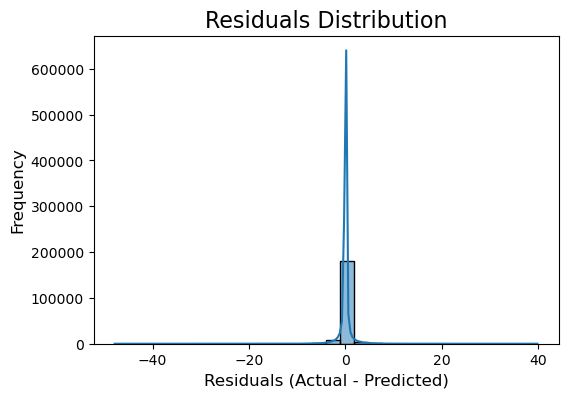

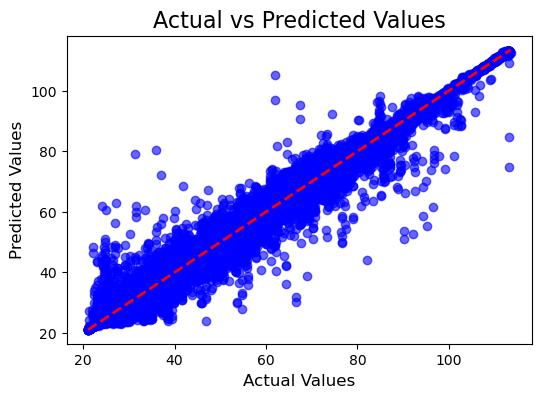

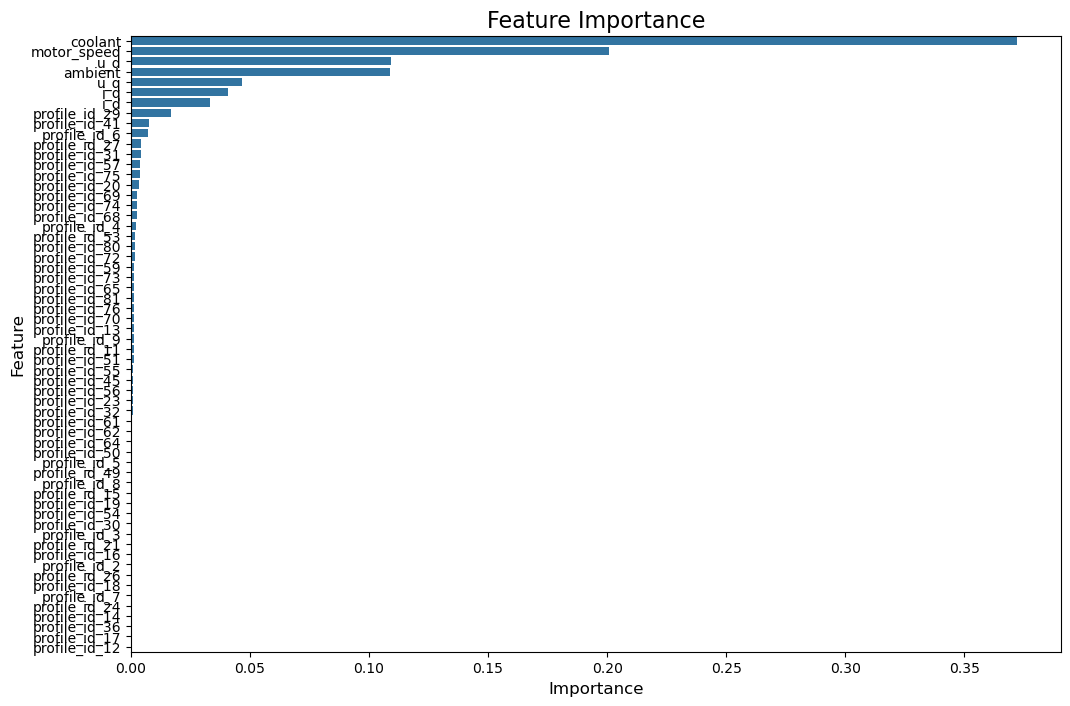

In [13]:
# Model Evaluation and prediction

import matplotlib.pyplot as plt 
import seaborn as sns 

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)  # MSE (default)
mae = mean_absolute_error(y_test, y_pred)  # MAE
rmse = np.sqrt(mse)  # Manual calculation of RMSE
r2 = r2_score(y_test, y_pred)  # R-Squared (R²)

# Printing performance metrics
print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

# Geting feature importance scores
feature_importances = model.feature_importances_

# Creating a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the residuals
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Plotting a scatter plot of Actual vs Predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show()

# Plotting Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()



** Now running the saved scripts on jupyter notebook - train_model.py // predict_fraud.py // app.py ***

In [39]:
# Importing the training script
!python train_model.py

Connected to database...

Data pre-processing completed 

Model Training stated using RandomForestRegressor!!!

Model and Scaler have been saved as EMT_model.joblib and EMT_scaler.joblib.


In [41]:
# Importing the Predict script
!python predict_model.py

Predicted 'pm': 65.88811650999999


In [43]:
import subprocess

# Now running the Flask app using subprocess
subprocess.Popen(["python", "app.py"])


<Popen: returncode: None args: ['python', 'app.py']>

In [45]:
import requests
import json

# URL of the Flask API endpoint
url = 'http://127.0.0.1:5005/predict'

# Sample input data with a single 'profile_id' field instead of one-hot encoding
input_data = {
    'u_q': 0.9,
    'coolant': 0.3,
    'u_d': 0.4,
    'motor_speed': 3500,
    'i_d': 0.9,
    'i_q': 0.5,
    'ambient': 29,
    'profile_id': 1,  # Single profile_id field instead of one-hot encoding
}

# Sending POST request to Flask API with the input data
response = requests.post(url, json=input_data)

# Checking the response status code
if response.status_code == 200:
    # If the request is successful, print the predicted 'pm' value
    response_json = response.json()
    print("Prediction received successfully!")
    print(f"Predicted 'pm': {response_json['predicted_pm']}")
else:
    # If there is an error, print the error message
    print(f"Failed to get prediction. Status Code: {response.status_code}")
    print(f"Error: {response.json()}")


Prediction received successfully!
Predicted 'pm': 65.90054204500001


127.0.0.1 - - [20/Dec/2024 23:22:58] "POST /predict HTTP/1.1" 200 -
